# 第一章 多层感知机学习

## 1.1 激活函数

激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活， 它们将输入信号转换为输出的可微运算。 大多数激活函数都是非线性的。 由于激活函数是深度学习的基础，下面简要介绍一些常见的激活函数。

In [2]:
%matplotlib inline
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

## ReLU激活函数

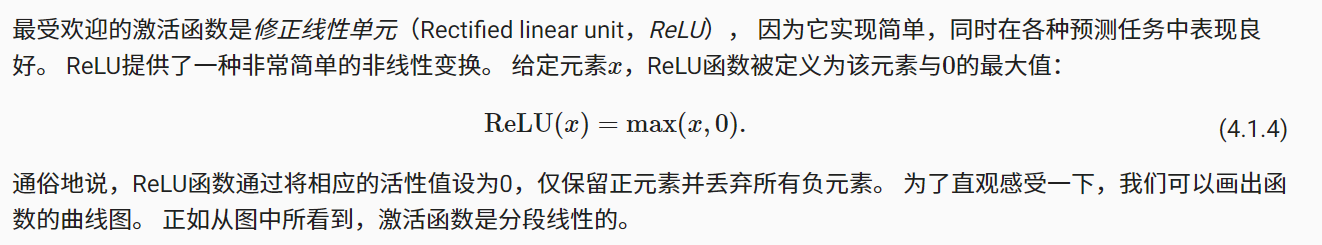

简单点说就是，比0大就是输出自己，比0小就是0

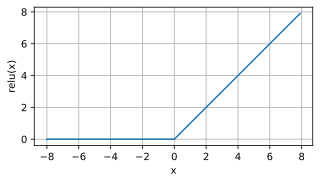

In [6]:
x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.relu(x)
d2l.plot(x, y, 'x', 'relu(x)', figsize=(5, 2.5))

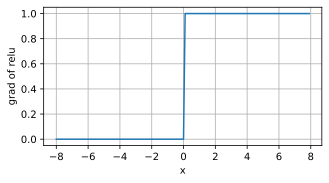

In [7]:
# 绘制relu的导数
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

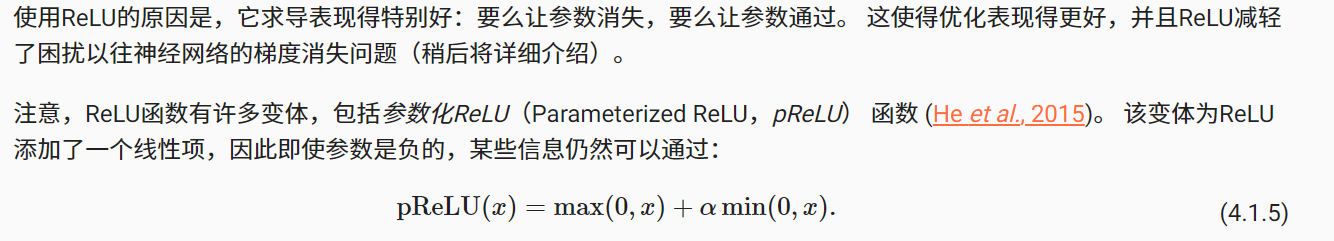

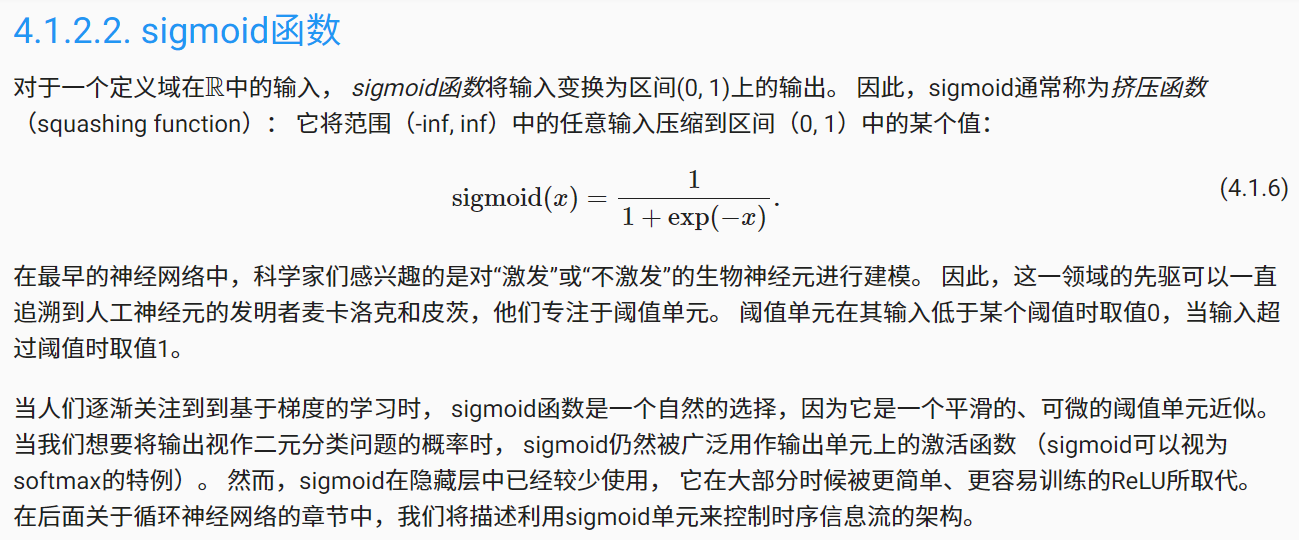

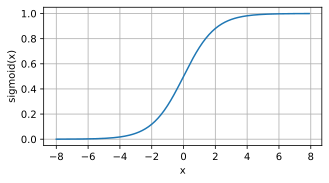

In [8]:
with autograd.record():
    y = npx.sigmoid(x)
d2l.plot(x, y, 'x', 'sigmoid(x)', figsize=(5, 2.5))

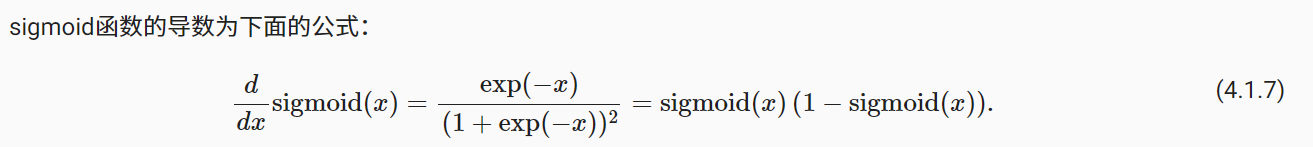

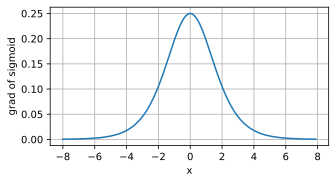

In [9]:
y.backward()
d2l.plot(x, x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

# 多层感知机代码实现

In [10]:
from mxnet import gluon, np, npx
from d2l import mxnet as d2l

npx.set_np()

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [28]:
# 256个隐藏层神经元、784个输入（28x28），10个最终输出类别，就一个隐藏层
num_inputs, num_outputs, num_hiddens,  num_hiddens1= 784, 10, 256,100

W1 = np.random.normal(scale=0.01, size=(num_inputs, num_hiddens))
b1 = np.zeros(num_hiddens)
W2 = np.random.normal(scale=0.01, size=(num_hiddens, num_hiddens1))
b2 = np.zeros(num_hiddens1)
W3 = np.random.normal(scale=0.01, size=(num_hiddens1, num_outputs))
b3 = np.zeros(num_outputs)
params = [W1, b1, W2, b2, W3, b3]

for param in params:
    param.attach_grad()

In [29]:
print(W1.shape)

(784, 256)


In [30]:
# relu 激活函数实现
def relu(X):
    return np.maximum(X, 0)

In [31]:
# 模型
def net(X):
    X = X.reshape((-1, num_inputs)) # 把输入搞成 1行784列的行向量
    H = relu(np.dot(X, W1) + b1) # 大于0就输出X，小于0就是0，消除一部分干扰
    H1 = relu(np.dot(H, W2) + b2) # 大于0就输出X，小于0就是0，消除一部分干扰
    return np.dot(H1, W3) + b3

In [32]:
loss = gluon.loss.SoftmaxCrossEntropyLoss()

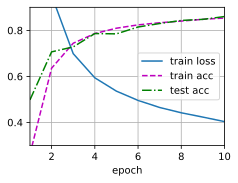

In [33]:
num_epochs, lr = 10, 0.1
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs,
              lambda batch_size: d2l.sgd(params, lr, batch_size))

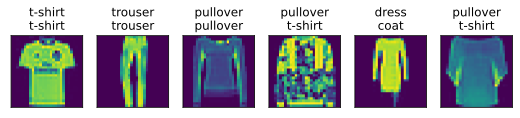

In [34]:
d2l.predict_ch3(net, test_iter)

In [35]:
from mxnet import gluon, init, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [36]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'),
        nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

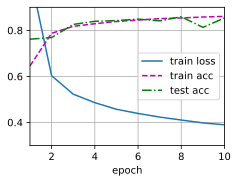

In [37]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = gluon.loss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': lr})

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

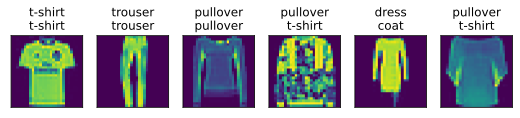

In [38]:
d2l.predict_ch3(net, test_iter)